In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
num_df=df.select_dtypes(include=[np.number])
cat_df=df.select_dtypes(exclude=[np.number])

In [19]:
num_df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [20]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [22]:
cat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


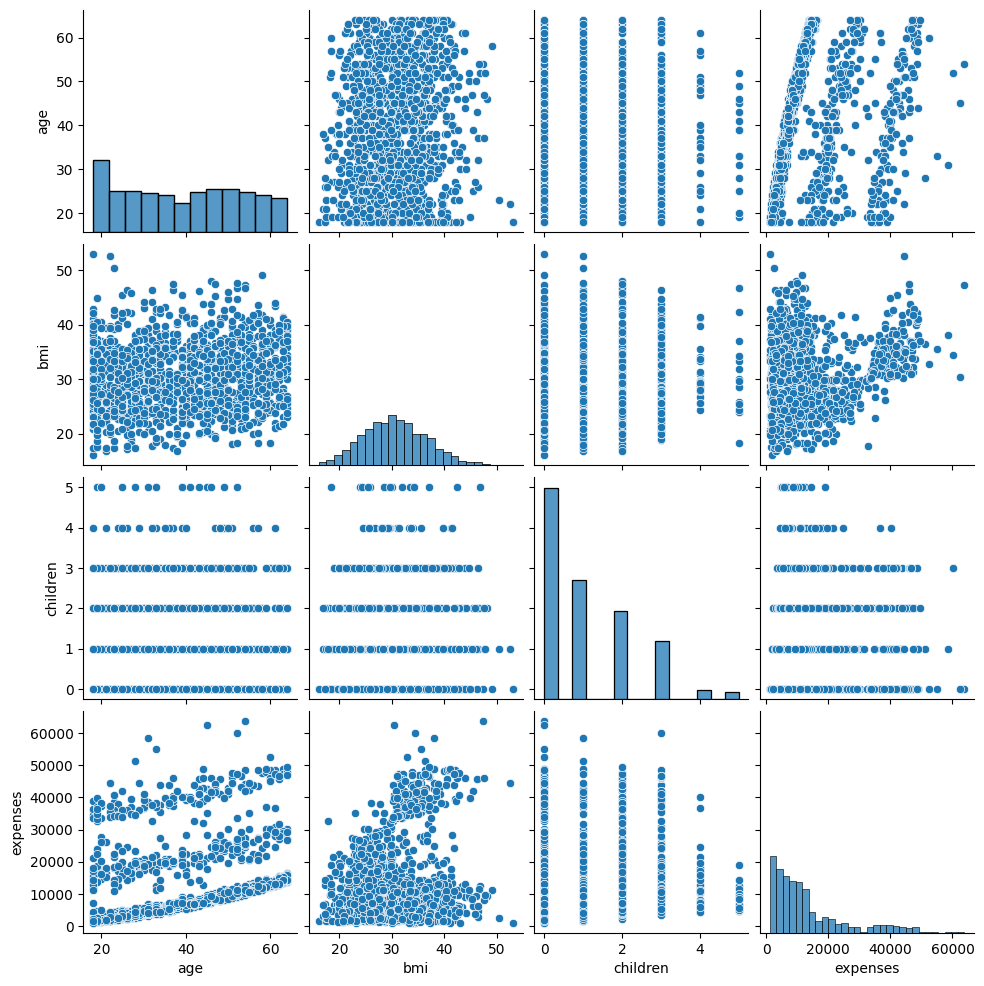

In [26]:
#pairwise plot
sns.pairplot(df)

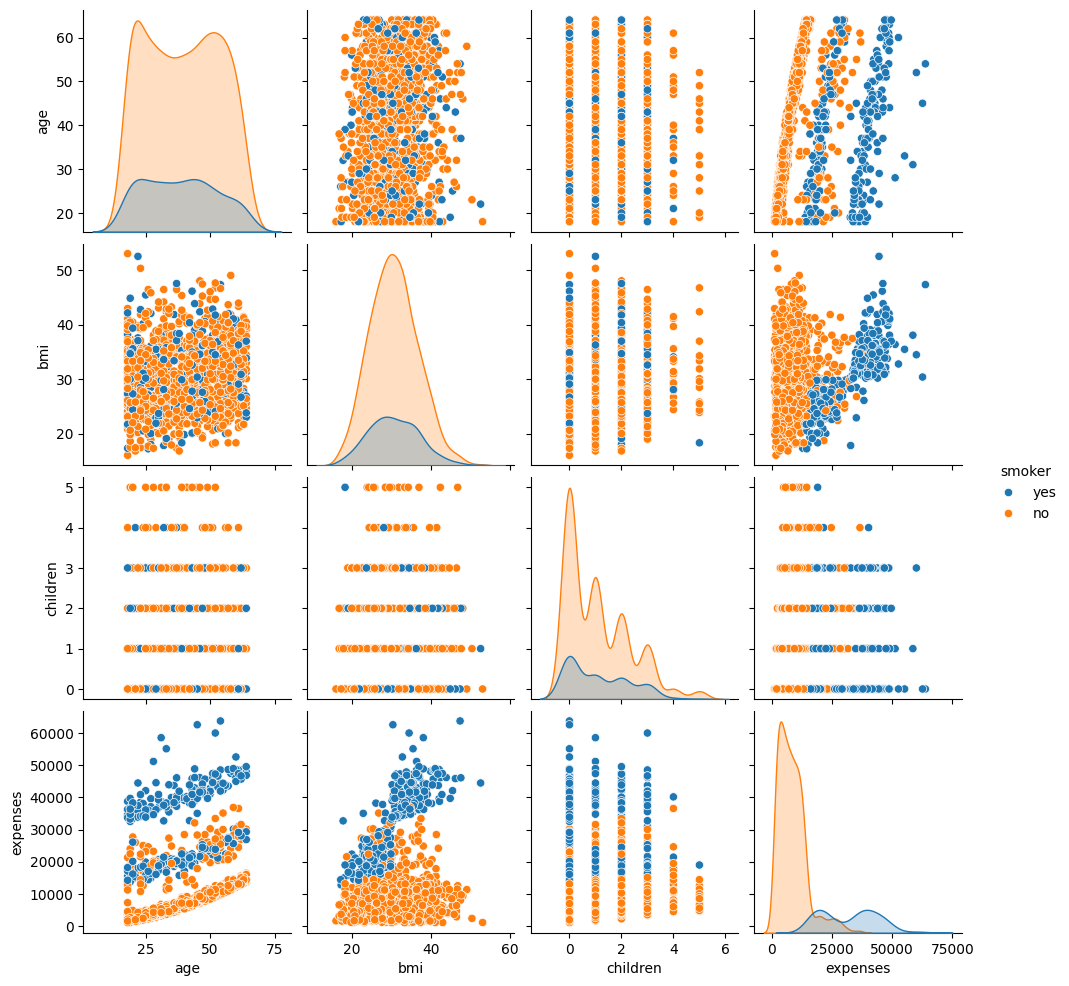

In [27]:
sns.pairplot(df, hue='smoker')


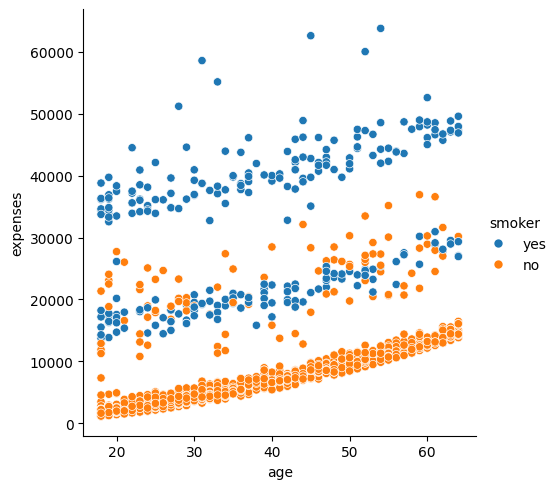

In [28]:
sns.relplot(data=df,x='age',y='expenses', hue='smoker')

In [30]:
non_smokers_df=df[df['smoker']=='no']
non_smokers_df.head()

,age,sex,bmi,children,smoker,region,expenses
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62


In [33]:
num_df=non_smokers_df.select_dtypes(include=[np.number])
cat_df=non_smokers_df.select_dtypes(exclude=[np.number])

In [35]:
num_df=num_df.corr(method='pearson')
num_df.corr()

,age,bmi,children,expenses
age,1.000000,-0.471625,-0.670447,0.955529
bmi,-0.471625,1.000000,-0.331996,-0.623698
children,-0.670447,-0.331996,1.000000,-0.518557
expenses,0.955529,-0.623698,-0.518557,1.000000


In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [39]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [41]:
X=non_smokers_df[['age']]
y=non_smokers_df['expenses']

In [44]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [46]:
#splitting the datasets into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
scaler.fit(X_train)

StandardScaler()

In [63]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.46164101],
       [ 1.73450419],
       [ 0.10806791],
       [ 1.02735798],
       [ 1.52236033],
       [-1.51836837],
       [ 1.59307495],
       [ 1.73450419],
       [-1.09408065],
       [-0.81122216],
       [-1.30622451],
       [ 0.46164101],
       [-0.17479058],
       [ 0.67378488],
       [-0.81122216],
       [-1.44765375],
       [ 1.38093109],
       [ 1.45164571],
       [ 0.7444995 ],
       [ 1.66378957],
       [-0.88193678],
       [-0.10407595],
       [ 0.17878253],
       [ 1.02735798],
       [-1.02336603],
       [-1.51836837],
       [-0.74050754],
       [-0.2455052 ],
       [ 1.0980726 ],
       [-0.52836368],
       [-1.44765375],
       [ 0.60307026],
       [ 0.67378488],
       [ 1.16878722],
       [-1.44765375],
       [ 0.03735329],
       [ 0.39092639],
       [ 1.23950184],
       [ 0.60307026],
       [-1.02336603],
       [-0.74050754],
       [ 1.73450419],
       [ 0.88592874],
       [-0.81122216],
       [ 0.32021177],
       [ 1

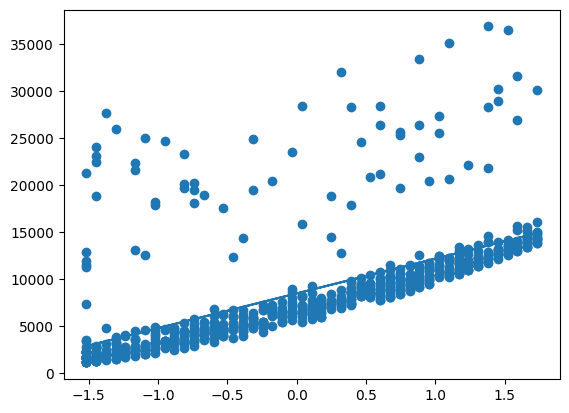

In [67]:
#best fit line
model.fit(X_train,y_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))

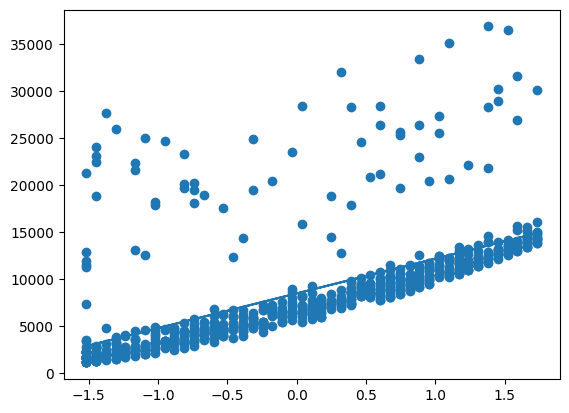

In [70]:
#best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))


In [73]:
model.coef_


array([3701.11779935])

In [74]:
model.intercept_

8476.887728494625

In [76]:
#prediction
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [82]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(np.sqrt(mse))
print(mae)

23361440911.749542
152844.49912165484
145167.69687221077


In [84]:
score=r2_score(y_test,y_pred)
score

-673.7473503529998